In [3]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, median_absolute_error, log_loss

Clean Building Data for Training

Load MS Buildings joined with OSM data

In [17]:
combined=pd.read_csv("C:\\Users\\nairk\\census-by-precincts\\info\\MS_Joined\\WA_buildings.csv")

C:\Users\nairk\AppData\Local\Temp\ipykernel_37644\970071261.py:1: DtypeWarning: Columns (10,12,14,16,18,20,25) have mixed types. Specify dtype option on import or set low_memory=False.
  combined=pd.read_csv("C:\\Users\\nairk\\census-by-precincts\\info\\MS_Joined\\WA_buildings.csv")


In [50]:
combined

,properties,id,Building_Area,GEOID,NAMELSAD,COUNTYNS,Tract,Area,osm_id,osm_way_id,...,leisure,man_made,military,natural,office,place,shop,sport,tourism,landuse
0,"{""height"":4.0254335403442383,""confidence"":-1.0}",0.0,68,3.003594e+10,Census Tract 9404,1719607.0,01719607 Census Tract 9404,5.650991e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{""height"":-1.0,""confidence"":-1.0}",1.0,116,3.003594e+10,Census Tract 9404,1719607.0,01719607 Census Tract 9404,5.650991e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{""height"":-1.0,""confidence"":-1.0}",2.0,49,3.003594e+10,Census Tract 9404,1719607.0,01719607 Census Tract 9404,5.650991e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{""height"":-1.0,""confidence"":-1.0}",3.0,67,3.003594e+10,Census Tract 9404,1719607.0,01719607 Census Tract 9404,5.650991e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{""height"":-1.0,""confidence"":-1.0}",4.0,176,3.003594e+10,Census Tract 9404,1719607.0,01719607 Census Tract 9404,5.650991e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901287,"{""height"":-1.0,""confidence"":-1.0}",5389.0,43,3.001902e+10,Census Tract 203,1637566.0,01637566 Census Tract 203,3.695044e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901288,"{""height"":-1.0,""confidence"":-1.0}",5390.0,36,3.001902e+10,Census Tract 203,1637566.0,01637566 Census Tract 203,3.695044e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901289,"{""height"":2.9063382148742671,""confidence"":-1.0}",5391.0,383,3.009109e+10,Census Tract 902,1677577.0,01677577 Census Tract 902,2.080475e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901290,"{""height"":-1.0,""confidence"":-1.0}",5392.0,20,3.001902e+10,Census Tract 203,1637566.0,01637566 Census Tract 203,3.695044e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
combined.columns

Index(['properties', 'id', 'Building_Area', 'GEOID', 'NAMELSAD', 'COUNTYNS',
       'Area', 'Tract', 'osm_id', 'osm_way_id', 'aeroway', 'amenity',
       'barrier', 'building', 'craft', 'geological', 'historic', 'land_area',
       'leisure', 'man_made', 'military', 'natural', 'office', 'place', 'shop',
       'sport', 'tourism', 'other_tags', 'landuse', 'other_tags_1'],
      dtype='object')

In [19]:
combined=combined.drop(columns=[ 'barrier',
       'other_tags', 'other_tags_1'])

In [30]:
combined=combined.drop(columns=['Join_Count', 'TARGET_FID', 'Join_Count_1', 'TARGET_FID_1',
       'Join_Count_12', 'TARGET_FID_12', 'type', 
       'OBJECTID_1',  'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON',  'CLASSFP', 'FUNCSTAT', 
       'Shape_Length_1', 'Shape_Area_1',  'name',
       'type_1',  'admin_level', 'barrier', 'boundary',
       'other_tags', 'Shape_Length_12', 'Shape_Area_12', 'osm_id_1',
       'osm_way_id_1', 'other_tags_1', 'Shape_Length_12_13',
       'Shape_Area_12_13', 'Shape_Length', 'Shape_Area','name_1', 'type_12','other_tags_1', 'Shape_Length_12_13', 'Shape_Area_12_13',
       'Shape_Length', 'Shape_Area'])

In [7]:
combined=combined.drop(columns=['layer', 'path'])

In [22]:
combined

,properties,id,Building_Area,GEOID,NAMELSAD,COUNTYNS,Area,Tract,osm_id,osm_way_id,...,leisure,man_made,military,natural,office,place,shop,sport,tourism,landuse
0,"{""height"":3.201298713684082,""confidence"":0.940...",0.0,129,28003950401,Census Tract 9504.01,711755,165134387.0,00711755 Census Tract 9504.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{""height"":-1.0,""confidence"":-1.0}",1.0,343,28003950401,Census Tract 9504.01,711755,165134387.0,00711755 Census Tract 9504.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{""height"":3.4031829833984371,""confidence"":-1.0}",2.0,424,28003950401,Census Tract 9504.01,711755,165134387.0,00711755 Census Tract 9504.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{""height"":-1.0,""confidence"":-1.0}",3.0,98,28003950401,Census Tract 9504.01,711755,165134387.0,00711755 Census Tract 9504.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{""height"":2.2167658805847168,""confidence"":0.98...",4.0,120,28003950402,Census Tract 9504.02,711755,161786740.0,00711755 Census Tract 9504.02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703066,"{""height"":-1.0,""confidence"":-1.0}",1703066.0,67,28071950507,Census Tract 9505.07,695759,429222134.0,00695759 Census Tract 9505.07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1703067,"{""height"":3.5323467254638672,""confidence"":-1.0}",1703067.0,403,28013950500,Census Tract 9505,695731,23387958.0,00695731 Census Tract 9505,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1703068,"{""height"":4.4618082046508789,""confidence"":-1.0}",1703068.0,218,28071950507,Census Tract 9505.07,695759,429222134.0,00695759 Census Tract 9505.07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1703069,"{""height"":-1.0,""confidence"":-1.0}",1703069.0,46,28013950100,Census Tract 9501,695731,657302924.0,00695731 Census Tract 9501,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
len(combined)

3426269

In [21]:
combined["building"].unique()

array(['yes', nan, 'church', 'house', 'hotel', 'retail', 'static_caravan',
       'commercial', 'school', 'shed', 'roof', 'toilets', 'hospital',
       'chapel', 'silo', 'garage', 'semidetached_house', 'industrial',
       'apartments', 'residential', 'mobile_home', 'garages', 'hangar',
       'storage', 'warehouse', 'greenhouse', 'government', 'detached',
       'office', 'motel', 'prison', 'terrace', 'barn', 'sports_centre',
       'manufacture', 'religious', 'train_station', 'dormitory', 'bank',
       'grandstand', 'public', 'retail;shed;yes', 'construction',
       'roof;yes', 'service', 'college', 'portable_classroom',
       'storage_tank', 'fire_station', 'carport', 'cabin', 'utility',
       'Manager Skagit Valley Apartments', 'farm_auxiliary',
       'Granite Falls', 'stable', 'gatehouse', 'civic', 'cowshed',
       'boathouse', 'dome', 'bungalow', 'ger', 'data_center',
       'university', 'kindergarten', 'parking', 'yes;house', 'bridge',
       'hut', 'farm', 'stadium', 'co

Get Buildings which are labeled with something other than 'yes'

In [22]:
labeled=combined[(combined["building"].notnull())&(combined["building"]!='yes')]

In [2]:
import ast

In [23]:
len(labeled)

544115

Add a Height attribute to the buildings

In [3]:
def add_height(x):
    t=ast.literal_eval(x)
    if t["height"]<0:
        return None
    return t["height"]

In [24]:
labeled["Height"]=labeled["properties"].apply(add_height)

C:\Users\nairk\AppData\Local\Temp\ipykernel_37644\3654869957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled["Height"]=labeled["properties"].apply(add_height)


In [84]:
labeled.rename(columns={'Area': 'Building_Area', 'Area_1': 'Area'}, inplace=True)

C:\Users\nairk\AppData\Local\Temp\ipykernel_11236\3196967565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled.rename(columns={'Area': 'Building_Area', 'Area_1': 'Area'}, inplace=True)


Drop unnecessory columns

In [25]:
labeled=labeled.drop(columns=['properties', 'id','GEOID', 'NAMELSAD', 'COUNTYNS', 'Tract',
       'Area', 'osm_id', 'osm_way_id'])

Add a Square Footage attribute to the buildings

In [13]:
def squarefootage(row):
    if row["Height"] != None and row["Building_Area"]!=None:
        return (row["Height"] * row["Building_Area"])/3
    else:
        return None

In [26]:
labeled["Square_Footage"]=labeled.apply(squarefootage,axis=1)

Store labled buildings to CSV

In [27]:
labeled.to_csv("C:\\Users\\nairk\\census-by-precincts\\info\\Labeled_Buildings\\WA_Labeled.csv",index=False)

Classifier Training

Load all labeled building files

In [4]:
buildings=[]

In [5]:
import os

directory = "C:\\Users\\nairk\\census-by-precincts\\info\\Labeled_Buildings"
for file in os.listdir(directory):
    path = os.path.join(directory, file)
    if os.path.isfile(path):
        row=pd.read_csv(path)
        print(len(row.columns))
        buildings.append(row)
    else:
        print("NO FILE")

C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4,6,8,9,10,11,12,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4,6,8,10,11,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4,6,9,10,11,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4,6,10,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4,10,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20
20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4,6,8,9,11,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4,6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,6,9,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20
20
20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)
C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (4,15) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)
C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4,6,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4,6,8,10,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,8,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,6,10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4,6,8,9,10,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4,6,8,9,10,12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (4,6,10,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


20
20


C:\Users\nairk\AppData\Local\Temp\ipykernel_1064\1436104920.py:7: DtypeWarning: Columns (1,4,8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  row=pd.read_csv(path)


Combine Building Files

In [6]:
labeled=pd.concat(buildings,ignore_index=True)

Check for existing Labels

In [43]:
labeled.aeroway.unique()

array([nan, 'hangar', 'terminal', 'helipad', 'launchpad', 'tower'],
      dtype=object)

In [46]:
labeled.amenity.unique()

array([nan, 'place_of_worship', 'fuel', 'car_wash', 'courthouse',
       'police', 'pharmacy', 'fire_station', 'bank', 'fast_food',
       'restaurant', 'social_facility', 'dentist', 'childcare', 'cafe',
       'hospital', 'events_venue', 'shelter', 'school', 'parking',
       'monastery', 'post_office', 'doctors', 'townhall', 'marketplace',
       'library', 'veterinary', 'car_wash;dog_wash', 'university',
       'car_rental', 'nursing_home', 'clinic', 'theatre', 'kindergarten',
       'toilets', 'recycling', 'ice_cream', 'bar', 'studio',
       'community_centre', 'pub', 'animal_shelter', 'bus_station',
       'arts_centre', 'cinema', 'music_venue', 'boat_rental',
       'boat_storage', 'gas', 'vehicle_inspection', 'ranger_station',
       'animal_boarding', 'dojo', 'mailroom', 'post_depot',
       'truck_rental', 'casino', 'social_centre', 'college', 'nightclub',
       'internet_cafe', 'prison', 'roller_rink', 'bicycle_parking',
       'music_school', 'stripclub', 'bbq', 'office', 

In [47]:
labeled.craft.unique()

array([nan, 'plumber', 'roofer', 'caterer', 'cleaning',
       'electronics_repair', 'photographer', 'signmaker', 'hvac',
       'glaziery', 'floorer', 'pottery', 'brewery', 'gardener',
       'shoemaker', 'welder', 'drilling', 'electrician', 'stonework',
       'metal_construction', 'stonemason', 'water_rafting', 'builder',
       'building_restoration', 'insulation', 'picture_frame_maker',
       'boatbuilder', 'carpenter', 'painter', 'tinsmith', 'upholsterer',
       'winery', 'construction', 'sawmill', 'key_cutter', 'fire_safety',
       'car_repair', 'excavation', 'sun_protection', 'atelier',
       'locksmith', 'distillery', 'yes', 'monumental_mason', 'printer',
       'photographic_laboratory', 'joiner', 'pest_control',
       'window_construction', 'carpet_layer', 'repair', 'machinery',
       'concrete', 'blacksmith', 'plumber;hvac', 'mechanic', 'embroider',
       'confectionery', 'photo_studio', 'print_shop', 'ceramic',
       'engraver', 'embroiderer', 'water_well_drilling'

In [48]:
labeled.geological.unique()

array([nan])

In [49]:
labeled.historic.unique()

array([nan, 'heritage', 'church', 'building', 'tomb', 'yes', 'maritime',
       'ruins', 'house', 'school', 'monument', 'hotel', 'military',
       'fort', 'naval', 'landmark', 'lighthouse', 'exhibit',
       'Original Community Church', 'Original Farm House',
       'place_of_worship', 'pumping_station', 'apartments', 'theatre',
       'manor', "Preacher's House", 'memorial', 'district', 'castle',
       'aircraft', 'fire_station', 'train_station', 'ship',
       'department_store', 'private_residence', 'rail road depot', 'mill',
       'barn', 'train', 'museum', 'railway_car', 'railway_station',
       'courthouse', 'granary', 'architectural site',
       'Noble-Seymour Crippen House', 'locomotive', 'heritage_building',
       'chapel', 'carriage_house', 'farmhouse', 'hospital', 'watermill',
       'post_office', 'rail_station', 'train_ferry', 'observatory',
       'station_site', 'lightouse', 'tower', 'Government_Building',
       'factory', 'industrial', 'brewery', 'folly', 'farm',

In [50]:
labeled.land_area.unique()

array([nan])

In [51]:
labeled.leisure.unique()

array([nan, 'sports_centre', 'stadium', 'fitness_centre', 'sports_hall',
       'picnic_table', 'hackerspace', 'miniature_golf', 'dance',
       'amusement_arcade', 'trampoline_park', 'escape_game', 'bleachers',
       'playground', 'tour_guide', 'dog_park', 'pitch', 'bowling_alley',
       'outdoor_seating', 'bandstand', 'ice_rink', 'park',
       'tanning_salon', 'swimming_pool', 'resort', 'batting_cage',
       'bingo_hall', 'sports_hall;trampoline_park', 'fitness_station',
       'common', 'yoga', 'indoor_play', 'golf_course', 'arena', 'firepit',
       'yes', 'marina', 'fishing', 'bleacher', 'comedy', 'shooting',
       'fitness_centre;bowling_alley', 'social_club', 'garden',
       'adult_gaming_centre', 'picnic', 'shooting_ground', 'horse_riding',
       'beach_resort', 'water_park', 'nature_reserve', 'bowling',
       'ingress', 'arts_centre', 'bird_hide', 'sauna', 'gun_range',
       'swimming_area', 'axe_throwing'], dtype=object)

In [52]:
labeled.man_made.unique()

array([nan, 'storage_tank', 'cooling', 'silo', 'works',
       'environmental_hazard', 'pier', 'pumping_station',
       'reservoir_covered', 'tank', 'tower', 'water_tower', 'bridge',
       'observatory', 'wastewater_plant', 'bladder', 'water_works',
       'foundation', 'kiln', 'windmill', 'air_vent', 'yes', 'water_well',
       'chimney', 'building', 'surveillance', 'canopy', 'tomb',
       'cooling_tower', 'dome', 'gasometer', 'obelisk', 'watermill',
       'chiller', 'lighthouse', 'mineshaft', 'beacon', 'street_cabinet',
       'fuel_pump', 'bunker_silo', 'ventilation_shaft',
       'vertical_wind_tunnel', 'works;environmental_hazard', 'courtyard',
       'tunnel', 'mast', 'storage_dome', 'mine', 'goods_conveyor'],
      dtype=object)

In [53]:
labeled.military.unique()

array([nan, 'office', 'bunker', 'checkpoint', 'training', 'barracks',
       'armory', 'school', 'yes', 'exchange', 'research',
       'registration_and_enlistment_office'], dtype=object)

In [54]:
labeled.natural.unique()

array([nan, 'water', 'grass', 'heath', 'wood'], dtype=object)

In [55]:
labeled.office.unique()

array([nan, 'financial', 'educational_institution', 'lawyer', 'therapist',
       'energy_supplier', 'government', 'company', 'insurance',
       'estate_agent', 'association', 'property_management', 'yes',
       'pest_control', 'tax_advisor', 'accountant', 'bail_bond_agent',
       'religion', 'ngo', 'logistics', 'employment_agency', 'research',
       'engineer', 'graphic_design', 'newspaper', 'architect',
       'water_utility', 'guide', 'physician', 'financial_advisor',
       'construction_company', 'administrative', 'school',
       'telecommunication', 'it', 'cheque_cashing', 'coworking',
       'surveyor', 'Faculty Offices:Fine Arts and Music (7100)',
       'Child Care Center (4000)', 'Counseling (3100)', 'Cal Poly ASI',
       'Nursing', 'Parking Information (6600)', 'diplomatic', 'rectory',
       'university', 'security', 'healthcare', 'parish', 'vacant',
       'charity', 'forestry', 'apartments', 'chiropractic', 'apartment',
       'sport', 'self_storage', 'translator', 

In [56]:
labeled.place.unique()

array([nan, 'square', 'neighbourhood', 'farm', 'city'], dtype=object)

In [57]:
labeled.shop.unique()

array([nan, 'convenience', 'supermarket', 'car_parts', 'trade',
       'variety_store', 'storage_rental', 'alcohol', 'bakery',
       'department_store', 'car_repair', 'car', 'rental', 'beverages',
       'wine', 'yes', 'doityourself', 'mall', 'hairdresser',
       'swimming_pool', 'boat', 'hardware', 'florist', 'chemist',
       'funeral_directors', 'tractor', 'tobacco', 'clothes',
       'frozen_food', 'second_hand;antiques', 'wholesale',
       'interior_decoration;furniture', 'jewelry;antiques', 'second_hand',
       'recreational_vehicle', 'tyres', 'plant_hire', 'vacant', 'gift',
       'piercing', 'wholesale;cleaning_supplies', 'mobile_phone',
       'tool_hire', 'craft', 'kiosk', 'country_store', 'bicycle', 'dairy',
       'e-cigarette', 'rv', 'charity', 'greengrocer', 'garden_centre',
       'gas', 'pyrotechnics', 'bed', 'sports', 'fabric', 'shoes',
       'beauty', 'motorcycle', 'flooring', 'furniture', 'copyshop',
       'pet_grooming', 'pet', 'general', 'tattoo', 'electronic

In [58]:
labeled.sport.unique()

array([nan, 'basketball', 'multi', 'equestrian', 'climbing_adventure',
       'athletics', 'trampoline', 'roller_skating', 'gymnastics', '10pin',
       'archery', 'volleyball;multi', 'yoga', 'billiards', 'pole_dance',
       'swimming', 'bouncing', 'american_football', 'fitness', 'climbing',
       'skiing', 'baseball;softball', 'soccer', 'shooting',
       'gymnastics;dance', 'tennis', 'golf', 'ice_skating;ice_hockey',
       'ice_hockey', 'racquet', 'kayak', 'karate', 'baseball', 'rowing',
       'weightlifting;crossfit', 'basketball;fitness', 'weightlifting',
       'bowling', 'karting', 'volleyball', 'basketball;volleyball',
       'fencing', 'sailing', 'ice_skating;ice_hockey;multi',
       'wrestling;basketball', 'bowls', 'billiards;fitness', 'jiu-jitsu',
       'skating', 'climbing;trampoline', 'swimming;racquetball',
       'ice_skating', 'basketball;ice_hockey', 'boxing',
       'basketball;strength_training;multi', 'boules',
       'soccer;basketball;weightlifting', 'basketb

In [59]:
labeled.tourism.unique()

array([nan, 'hotel', 'motel', 'museum', 'information', 'attraction',
       'picnic_site', 'chalet', 'hostel', 'alpine_hut', 'camp_site',
       'apartment', 'guest_house', 'gallery', 'aquarium', 'artwork',
       'arts_centre', 'viewpoint', 'hotel;motel', 'yes', 'motel;hotel',
       'railway_station', 'wilderness_hut', 'theme_park', 'camp_pitch',
       'yes;attraction', 'wine_cellar', 'winery', 'wine_tasting',
       'conservatory', 'cabin', 'amusement_park', 'nature_centre',
       'place_of_worship', 'zoo', 'art_gallery', 'cultural',
       'caravan_site', 'construction', 'landmark', 'convention_center',
       'haunted'], dtype=object)

In [30]:
labeled.columns

Index(['Building_Area', 'aeroway', 'amenity', 'building', 'craft',
       'geological', 'historic', 'land_area', 'leisure', 'man_made',
       'military', 'natural', 'office', 'place', 'shop', 'sport', 'tourism',
       'landuse', 'Height', 'Square_Footage'],
      dtype='object')

Drop unnecessary Columns

In [7]:
labeled=labeled.drop(columns=['aeroway', 'amenity', 'craft', 'geological', 'historic',
       'land_area', 'leisure', 'man_made', 'military', 'natural', 'office',
       'place', 'shop', 'sport', 'tourism'])

In [6]:
labeled.columns

Index(['Building_Area', 'building', 'landuse', 'Height', 'Square_Footage'], dtype='object')

In [5]:
#cat_cols=['aeroway', 'amenity', 'craft', 'geological', 'historic','land_area', 'leisure', 'man_made', 'military', 'natural', 'office','place', 'shop', 'sport', 'tourism', 'landuse']

In [56]:
labeled.columns

Index(['Building_Area', 'Height', 'Square_Footage', 'landuse_cat'], dtype='object')

In [7]:
#for col in ['aeroway', 'amenity', 'craft', 'geological', 'historic',
#       'land_area', 'leisure', 'man_made', 'military', 'natural', 'office',
#       'place', 'shop', 'sport', 'tourism', 'landuse']:
#            labeled[col] = labeled[col].astype('category')
#            labeled[col] = labeled[col].astype('category')

Categorize labels into 10 classes

In [8]:
classes={}

In [9]:
build_Acc=['residential_duplex','chalet','guest_house','duplex','residence','condo','accomodation','Residential_Condominium','condominiums','mansion','residences','mobile_home','townhome','fraternity house','motel','apartments', 'barracks', 'bungalow', 'cabin','Condominium','condominium','condomnium' ,'detached', 'annexe' ,'dormitory', 'farm','ger','hotel','house','houses','houseboat','residential','semidetached_house','static_caravan','stilt_house','terrace','tree_house','trullo']
build_Com=['store','cinema','factory','business','shopping','mall','COMMERCIAL','theatre','saloon','amphitheatre','pharmacy','grocery_store','commercial','casino','market','laundromat','bar','restaurant','commercial','industrial','kiosk','office','retail','supermarket','warehouse','bank','shop']
build_Rel=['convent','religious','cathedral','chapel','church','kingdom_hall','monastery','mosque','presbytery','shrine','synagogue','temple']
build_CA=['townhall','municipal','parish_hall','social_facility','community_centre','town_hall','courthouse','music_school','administration','childcare','government_office','prison','museum','Museum','police_station','jail','library','healthcare','amenity','clinic','post_office','bakehouse','bridge','civic','college','fire_station','government','gatehouse','hospital','kindergarten','museum','public','school','toilets','train_station','transportation','university']
build_Agr=['ranch','farmhouse','barm','barns','barn','conservatory','cowshed','farm_auxiliary','greenhouse','slurry_tank','stable','sty','livestock']
build_Sports=['skating_rink','gazebo','clubhouse','recreational','gym','sports','arena','athletic','sports','pool','grandstand','pavilion','riding_hall','sports_hall','sports_centre','stadium','gymnasium','dugout']
build_Stor=['storage_tanks','water_tank','hanger','storage_rental','self_storage','boat storage house','loafing_shed','storage','allotment_house','boathouse','hangar','hut','shed']
build_car=['carports','carport','garage','garages','parking','parking_shelter','parking_garage']
build_pow=['power_substation','data_center','datacenter','power','digester','service','tech_cab','transformer_tower','water_tower','storage_tank','silo']
build_other=['lifeguard_tower','fuel','pumping_stateion','ruin','shelter','abandoned','demolished','hogan','beach_hut','bunker','castle','construction','container','guardhouse','military','outbuilding','pagoda','quonset_hut','roof','ruins','tent','tower','windmill']

In [10]:
for i in build_Acc:
    classes[i]=0
for i in build_Com:
    classes[i]=1
for i in build_Rel:
    classes[i]=2
for i in build_CA:
    classes[i]=3
for i in build_Agr:
    classes[i]=4
for i in build_Sports:
    classes[i]=5
for i in build_Stor:
    classes[i]=6
for i in build_car:
    classes[i]=7
for i in build_pow:
    classes[i]=8
for i in build_other:
    classes[i]=9
for i in labeled.building.unique():
    if classes.get(i)==None:
        classes[i]=10

Filter out labels outside defined categories

In [11]:
good=[]

In [12]:
for i in classes.keys():
    if classes.get(i)!=10:
        good.append(i)

In [13]:
labeled=labeled[labeled["building"].isin(good)]

Categorize Landuse into 10 categories

In [12]:
labeled.landuse.unique()

array([nan, 'military', 'industrial', 'residential', 'cemetery',
       'commercial', 'farmland', 'meadow', 'grass', 'clearing', 'forest',
       'farmyard', 'retail', 'garages', 'quarry', 'religious',
       'recreation_ground', 'brownfield', 'flowerbed', 'construction',
       'animal_keeping', 'greenhouse_horticulture', 'university',
       'plant_nursery', 'education', 'factory', 'railway', 'municipial',
       'village_green', 'landfill', 'municipal', 'leisure',
       'winter_sports', 'reservoir', 'orchard', 'fairground', 'storage',
       'construction;residential', 'utility', 'logistics', 'abandoned',
       'greenfield', 'government', 'public', 'aquaculture', 'vineyard',
       'farm', 'civic_admin', 'civic', 'allotments', 'institutional',
       'wholesale', 'transport', 'harbour', 'paved', 'commercial;retail',
       'water_storage', 'oil_field', 'shrubs', 'public_building',
       'special_use', 'public_facility', 'quad', 'commercial;residential',
       'yes', 'Maintenance

In [14]:
landuse_Acc=[ 'residential', 'accommodation', 'duplex','commercial;residential', 'residential;commercial', 'residential;retail',]
landuse_Com=[ 'industrial', 'commercial', 'retail', 'quarry', 'factory', 'landfill',
       'wholesale', 'oil_field', 'demolished:industrial',
        'warehousing', 'Warehouse','radio','airport','brownfield']
landuse_Rel=[ 'cemetery', 'religious','churchyard']
landuse_CA=[ 'university','education', 'municipial',
        'municipal', 'government', 'public', 'civic_admin', 'civic', 'institutional',
        'public_building', 'public_facility', 'quad', 'administrative', 
       'governmental', 'district',  'prison', 'public_works','public_safety', 'official',
       'emergency', 'healthcare', 'civil', 'school', 'justice', 'observatory', 'civic_safety', 'research',
       'transportation', 'railway', 'road_maintenance', 'administration', 'highway','village_green', 'terminal']
landuse_Agr=['farmland', 'meadow', 'grass', 'clearing', 'forest',
       'farmyard', 'flowerbed', 'animal_keeping', 'greenhouse_horticulture',
       'plant_nursery', 'orchard', 'greenfield', 'aquaculture', 'vineyard',
       'farm', 'shrubs', 'nature reserve', 'fairground','disused:farmland',
       'pasture', 'basin', 'allotments',
        'conservation', 'animal_enclosure', 'desert', 'apiary', 'land','agriculture', 'greenery', 'festival_grounds']
landuse_Sports=['recreation_ground', 'leisure','winter_sports', 'recreation','park']
landuse_Stor=[ 'reservoir', 'storage','harbour','transload','water_storage','depot','wharf','shipyard','reservoir_watershed', ]
landuse_Car=[ 'garages', 'vehicle_repair','parking']
landuse_Pow=['utility', 'logistics','Maintenance Area', 'waterworks','hydro_power', 'windfarm']
landuse_Other=['military', 'construction','construction;residential', 'abandoned','historic;residential', 'demolished:industrial','rest area', 'patio','historic', 'vacant']

In [15]:
#Amen_Substance=['bar','biergarten','cafe','fast_food','food_court','ice_cream','pub','restaurant']
#Amen_Education=['college','dancing_school','driving_school','first_aid_school','kindergarten','language_school','library','surf_school','toy_library','research_institute','training','music_school','school','traffic_park','university']
#Amen_Trans=['bicycle_parking','bicycle_repair_station','bicycle_rental','bicycle_wash','boat_rental','boat_sharing','bus_station','car_rental','car_sharing','car_wash','compressed_air','vehicle_inspection','charging_station','driver_training','ferry_terminal','fuel','grit_bin','motorcycle_parking','parking','parking_entrance','parking_space','taxi','weighbridge']
#Amen_Fin=['atm','payment_terminal','bank','bureau_de_change','money_transfer','payment_centre']
#Amen_HC=['baby_hatch','clinic','dentist','doctors','hospital','nursing_home','pharmacy','social_facility','veterinary']
#Amen_EAC=['arts_centre','brothel','casino','cinema','community_centre','conference_centre','events_venue','exhibition_centre','fountain','gambling','love_hotel','music_venue','nightclub','planetarium','public_bookcase','social_centre','stage','stripclub','studio','swingerclub','theatre']
#Amen_PS =['courthouse','fire_station','police','post_box','post_depot','post_office','prison','ranger_station','townhall']
#Amen_Fac=['bbq','bench','dog_toilet','dressing_room','drinking_water','give_box','mailroom','parcel_locker','shelter','shower','telephone','toilets','water_point','watering_place']
#Amen_WM=['sanitary_dump_station','recycling','waste_basket','waste_disposal','waste_transfer_station']
#Amen_Other=['animal_boarding','animal_breeding','animal_shelter','animal_training','baking_oven','clock','crematorium','dive_centre','funeral_hall','grave_yard','hunting_stand','internet_cafe','kitchen','kneipp_water_cure','lounger','marketplace','monastery','mortuary','photo_booth','place_of_mourning','place_of_worship','public_bath','refugee_site','vending_machine']
#split land_dev
#land_Dev=['commercial','construction','education','fairground','industrial','residential','retail','institutional']
#land_Rural=['aquaculture','allotments','farmland','farmyard','paddy','animal_keeping','flowerbed','forest','greenhouse_horticulture','meadow','orchard','plant_nursery','vineyard']
#split land_other
#land_other=['brownfield','cemetery','depot','garages','grass','greenfield','landfill','military','port','quarry','railway','recreation_ground','religious','village_green','winter_sports']

#natural_veg=['fell','grassland','health','moor','scrub','shrubbery','tree','tree_row','tree_stump','tundra','wood']
#natural_water=['bay','beach','blowhole','cape','coastline','crevasse','geyser','glacier','hot_spring','isthmus','mud','peninsula','reef','shingle','shoal','spring','strait','water','wetland']
#natural_geo=['arch','arete','bare_rock','blockfield','cave_entrance','cliff','dune','earth_bank','fumarole','gully','hill','peak','ridge','rock','saddle','sand','scree','sinkhole','stone','valley','volcano']

#place_urban=['city','borough','suburb','quarter','neighbourhood','city_block','plot']
#place_rural=['town','village','hamlet','isolated_dwelling','farm','allotments']

#shop_food=['alcohol','bakery','beverages','brewing_supplies','butcher','cheese','chocolate','coffee','confectionery','convenience','dairy','deli','farm','food','frozen_food','greengrocer','health_food','ice_cream','nuts','pasta','pastry','seafood','spices','tea','tortilla','water','wine']
#shop_general=['department_store','general','kiosk','mall','supermarket','wholesale']
#shop_clothing=['baby_goods','bag','boutique','clothes','fabric','fashion_accessories','jewelry','leather','sewing','shoes','shoe_repair','tailor','watches','wool']
#shop_discount=['charity','second_hand','variety_store']
#shop_health=['beauty','chemist','cosmetics','erotic','hairdresser','hairdresser_supply','hearing_aids','herbalist','massage','medical_supply','nutrition_supplements','optician','perfumery','tattoo']
#shop_diy=['agrarian','appliance','bathroom_furnishing','country_store','doityourself','electrical','energy','fireplace','florist','garden_centre','garden_furniture','gas','glaziery','groundskeeping','hardware','houseware','locksmith','paint','pottery','security','tool_hire','trade']
#shop_furniture=['antiques','bed','candles','carpet','curtain','doors','flooring','furniture','household_linen','interior_decoration','kitchen','lighting','tiles','window_blind']
#shop_electronics=['computer','electronics','hifi','mobile_phone','printer_ink','radiotechnics','telecommunication','vacuum_cleaner']
#shop_outdoors=['atv','bicycle','boat','car','car_parts','car_repair','caravan','fishing','fuel','golf','hunting','military_surplus','motorcycle','motorcycle_repair','outdoor','scuba_diving','ski','snowmobile','sports','surf','swimming_pool','trailer','truck','tyres']
#shop_hobby=['art','camera','collector','craft','frame','games','model','music','musical_instrument','photo','trophy','video','video_games']
#shop_gifts=['anime','books','gift','lottery','newsagent','stationery','ticket']
#shop_other=['bookmaker','cannabis','copyshop','dry_cleaning','e-cigarette','funeral_directors','laundry','money_lender','outpost','party','pawnbroker','pest_control','pet','pet_grooming','pyrotechnics','religion','rental','storage_rental','tobacco','toys','travel_agency','vacant','weapons']


Get target attribute

In [16]:
target=labeled.building

In [17]:
target

0           9
1           0
2           0
3           0
4           0
           ..
14976558    0
14976559    0
14976560    0
14976561    0
14976562    7
Name: building, Length: 14968881, dtype: int64

In [17]:
target = target.map(classes)

In [18]:
def add_land_cat(x):
    if x in landuse_Acc:
        return 0
    elif x in landuse_Com:
        return 1
    elif x in landuse_Rel:
        return 2
    elif x in landuse_CA:
        return 3
    elif x in landuse_Agr:
        return 4
    elif x in landuse_Sports:
        return 5
    elif x in landuse_Stor:
        return 6
    elif x in landuse_Car:
        return 7
    elif x in landuse_Pow:
        return 8
    elif x in landuse_Other:
        return 9
    else:
        return None

In [18]:
labeled.columns

Index(['Building_Area', 'building', 'landuse', 'Height', 'Square_Footage'], dtype='object')

Apply Landuse Categoration and drop unnecessary columns

In [19]:
labeled["landuse_cat"]=labeled["landuse"].apply(add_land_cat)

In [20]:
labeled=labeled.drop(columns=['building', 'landuse'])

In [22]:
target

0           9
1           0
2           0
3           0
4           0
           ..
14976558    0
14976559    0
14976560    0
14976561    0
14976562    7
Name: building, Length: 14968881, dtype: int64

Create train and test sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(labeled, target, test_size=0.2, random_state=42,shuffle=True)

In [58]:
len(labeled)

14968881

In [22]:
len(labeled)

14968881

Garbage Collection

In [22]:
import gc

In [23]:
labeled=0
buildings=0
target=0
classes=0

In [24]:
gc.collect()

0

In [26]:
X_train

,Building_Area,Height,Square_Footage,landuse_cat
12956901,178.0,3.197806,189.736496,NaN
2751601,201.0,5.307995,355.635686,0.0
13742718,175.0,6.150753,358.793954,0.0
8409323,32.0,2.996947,31.967430,NaN
3457943,395.0,5.087383,669.838797,NaN
...,...,...,...,...
4305874,199.0,4.848610,321.624490,0.0
10086090,470.0,4.278526,670.302455,0.0
6553818,195.0,5.870377,381.574509,NaN
6426541,2388.0,5.953478,4738.968756,1.0


In [27]:
y_train

12956901    0
2751601     0
13742718    0
8409323     7
3457943     0
           ..
4305874     0
10086090    0
6553818     0
6426541     1
14809652    7
Name: building, Length: 11975104, dtype: int64

Create Dataset for LGBM

In [25]:
lgb_train = lgb.Dataset(
    X_train,
    y_train,
    categorical_feature=['f4'],
    feature_name=[f"f{i + 1}" for i in range(X_train.shape[-1])]
)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)
#lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

In [26]:
params = {"learning_rate": 0.01, "verbose": -1,"boosting_type": "gbdt", "objective":"multiclass","num_classes":10,"min_data_in_leaf": 200}

In [27]:
lgb_train.feature_name

['f1', 'f2', 'f3', 'f4']

In [ ]:
#evals_result = {}
#num_round = 1700
#cv_results = lgb.cv(
#    params,
#    lgb_train,
#    num_boost_round=num_round,
#    nfold=5,
#    callbacks=[ lgb.log_evaluation(10)],
#    stratified=False
#)


Training

In [28]:
train_result = {}
best_round = 1700
print(best_round)
model = lgb.train(params, lgb_train, num_boost_round=best_round,valid_sets=[lgb_train],
    callbacks=[lgb.log_evaluation(10), lgb.record_evaluation(train_result)])

1700
[10]	training's multi_logloss: 0.435594
[20]	training's multi_logloss: 0.39916
[30]	training's multi_logloss: 0.375813
[40]	training's multi_logloss: 0.359381
[50]	training's multi_logloss: 0.347264
[60]	training's multi_logloss: 0.338077
[70]	training's multi_logloss: 0.330995
[80]	training's multi_logloss: 0.325463
[90]	training's multi_logloss: 0.321098
[100]	training's multi_logloss: 0.317633
[110]	training's multi_logloss: 0.314862
[120]	training's multi_logloss: 0.312637
[130]	training's multi_logloss: 0.310841
[140]	training's multi_logloss: 0.309384
[150]	training's multi_logloss: 0.308196
[160]	training's multi_logloss: 0.307223
[170]	training's multi_logloss: 0.30642
[180]	training's multi_logloss: 0.305758
[190]	training's multi_logloss: 0.305207
[200]	training's multi_logloss: 0.304748
[210]	training's multi_logloss: 0.30436
[220]	training's multi_logloss: 0.304032
[230]	training's multi_logloss: 0.303753
[240]	training's multi_logloss: 0.303518
[250]	training's multi_

In [32]:
len(X_train)

11975104

In [33]:
len(X_test)

2993777

In [34]:
len(X_train)+len(X_test)

14968881

Load Model From Existing (If Possible)

In [23]:
model= lgb.Booster(model_file='building_model.txt')

Testing

In [24]:
y_pred = model.predict(X_test)
log = log_loss(y_test, y_pred)
print("Mean Absolute Error:", log)

Mean Absolute Error: 0.3023025374533888


In [29]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

import lightgbm as lgb

%matplotlib inline

try:
    # To enable interactive mode you should install ipywidgets
    # https://github.com/jupyter-widgets/ipywidgets
    from ipywidgets import interact, SelectMultiple

    INTERACTIVE = True
except ImportError:
    INTERACTIVE = False

In [33]:
model.best_score

defaultdict(collections.OrderedDict,
            {'training': OrderedDict([('multi_logloss',
                           0.30043786297393904)])})

In [30]:
def render_metric(metric_name):
    
    lgb.plot_metric(train_result,metric=metric_name, figsize=(10, 5))

In [37]:
model.params

{'learning_rate': 0.01,
 'verbose': -1,
 'boosting_type': 'gbdt',
 'objective': 'multiclass',
 'num_classes': 10,
 'min_data_in_leaf': 200,
 'num_iterations': 1700,
 'categorical_column': [3]}

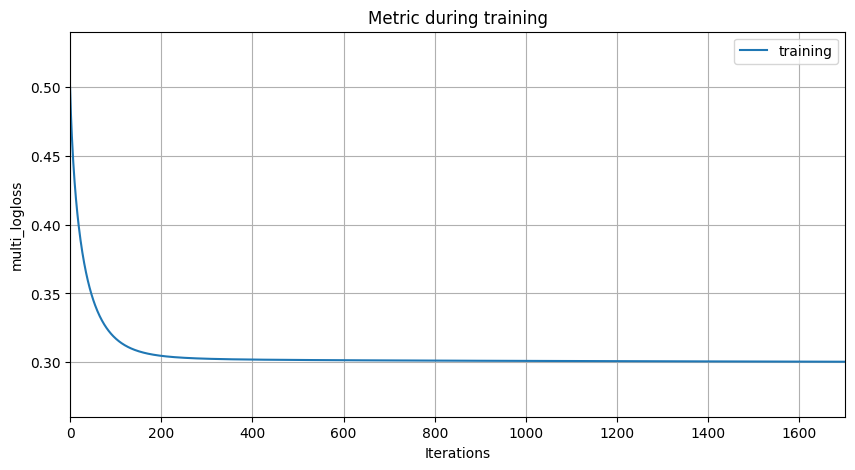

In [31]:
if INTERACTIVE:
    # create widget to switch between metrics
    interact(render_metric, metric_name='multi_logloss')
else:
    render_metric('multi_logloss')

Save Model

In [39]:
model.save_model('building_model.txt')